# Рекомендация тарифов оператора сотовой связи

Нам доступны данные о поведении клиентов федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Нужно построить модель для задачи классификации, которая выберет для клиента подходящий тариф.

Необходимо построить модель с максимально большим значением *accuracy*. Доля правильных ответов должна быть не менее 0.75.

## Изучение данных

In [1]:
# импортируем библиотеки

import pandas as pd
import matplotlib.pyplot as plt
import warnings

from matplotlib.pyplot import rcParams as rcp
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tqdm import tqdm

In [2]:
# настроим игнорирование предупреждений

warnings.simplefilter('ignore')

In [3]:
# сохраняем данные в датафрейм

df = pd.read_csv('/datasets/users_behavior.csv')

In [4]:
# выведем общую информацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
# выведем первые 10 строк датафрейма

df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


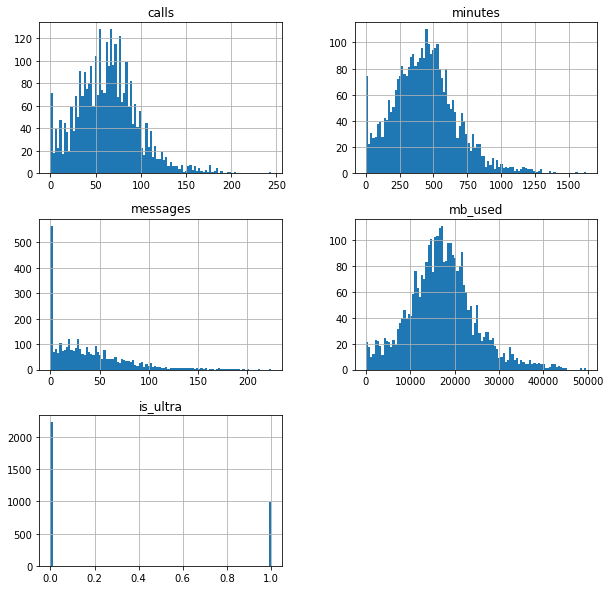

In [6]:
# построим гистограммы по данным из каждого столбца датафрейма

df.hist(bins=100, figsize=(10,10));

## Разбивка данных на выборки

In [7]:
features = df.drop(['is_ultra'], axis=1)

In [8]:
target = df['is_ultra']

Разобьем данные на обучающую, валидационную и тестовую выборки по схеме 3-1-1.

In [9]:
# выделим валидационную выборку из данных

features_train_test, features_valid, target_train_test, target_valid = train_test_split(
    features, target, test_size=0.2, stratify=target, random_state=12345)

In [10]:
# разобьем данные на обучающую и тестовую выборки

features_train, features_test, target_train, target_test = train_test_split(
    features_train_test, target_train_test, test_size=0.25, stratify=target_train_test, random_state=12345)

In [11]:
# выведем общую информацию о каждом датафрейме - с обучающей, валидационной и тестовой выборками

dataframes = [features_train, features_valid, features_test]

for dataframe in dataframes:
    dataframe.info()
    print('''
    
    ''')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 1659 to 607
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     1928 non-null   float64
 1   minutes   1928 non-null   float64
 2   messages  1928 non-null   float64
 3   mb_used   1928 non-null   float64
dtypes: float64(4)
memory usage: 75.3 KB

    
    
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 2424 to 873
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null    float64
 1   minutes   643 non-null    float64
 2   messages  643 non-null    float64
 3   mb_used   643 non-null    float64
dtypes: float64(4)
memory usage: 25.1 KB

    
    
<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 580 to 2867
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     643 non-null 

In [12]:
# выведем первые 10 строк каждого датафрейма - с обучающей, валидационной и тестовой выборками

dataframes = [features_train, features_valid, features_test, target_train, target_valid, target_test]

for dataframe in dataframes:
    display(dataframe.head())

,calls,minutes,messages,mb_used
1659,27.0,170.58,23.0,21798.61
2176,75.0,489.47,7.0,20478.94
108,47.0,300.12,123.0,31244.61
426,36.0,198.96,32.0,21596.86
1892,102.0,740.28,19.0,17864.12


,calls,minutes,messages,mb_used
2424,56.0,364.36,0.0,14129.94
2118,76.0,430.70,34.0,25138.49
2034,108.0,812.04,4.0,24490.28
2286,67.0,460.76,27.0,16626.26
1364,69.0,515.52,34.0,21231.90


,calls,minutes,messages,mb_used
580,43.0,321.63,42.0,25599.87
2272,93.0,658.89,38.0,17655.47
1415,82.0,507.89,88.0,17543.37
1356,43.0,256.90,1.0,10450.48
1910,111.0,728.20,37.0,14135.23


1659    0
2176    1
108     1
426     0
1892    0
Name: is_ultra, dtype: int64

2424    0
2118    0
2034    1
2286    0
1364    0
Name: is_ultra, dtype: int64

580     1
2272    1
1415    1
1356    0
1910    0
Name: is_ultra, dtype: int64

С выборками все в порядке.

## Исследование моделей

### Дерево решений

Зададим переменные, которым передадим параметры будущей модели.

In [13]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0

Создадим пустые списки, в которые сохраним значения accuracy_score для дерева каждой глубины для обучающей и валидационной выборки.

In [14]:
tree_metrics_train = []
tree_metrics_valid = []

Напишем цикл, который выберет лучшую модель (с наибольшей долей правильных ответов) в зависимости от глубины решающего дерева.

In [15]:
for depth in range(1, 31):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions_train = model.predict(features_train)
    result_train = accuracy_score(target_train, predictions_train)
    tree_metrics_train.append(result_train)
    predictions_valid = model.predict(features_valid)
    result_valid = accuracy_score(target_valid, predictions_valid)
    tree_metrics_valid.append(result_valid)
    if result_valid > best_result_tree:
        best_model_tree = model
        best_result_tree = result_valid
        best_depth_tree = depth

Построим линейный график зависимости правильности предсказаний модели от глубины дерева решений.

In [16]:
# преобразуем списки с accuracy в датафреймы 

tree_metrics_train = pd.DataFrame(tree_metrics_train)
tree_metrics_valid = pd.DataFrame(tree_metrics_valid)

# зададим для них новую индексацию - в соответствии с глубинами деревьев

tree_metrics_train.index = list(range(1, 31))
tree_metrics_valid.index = list(range(1, 31))

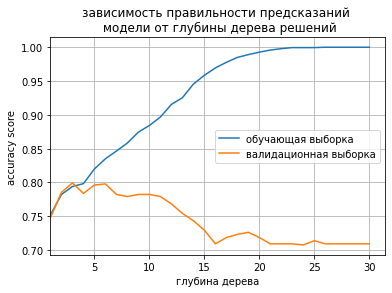

In [17]:
plt.title('зависимость правильности предсказаний \n модели от глубины дерева решений')

plt.plot(tree_metrics_train);
plt.plot(tree_metrics_valid);

plt.xlim(1)

plt.legend(['обучающая выборка', 'валидационная выборка'])

plt.xlabel('глубина дерева', fontsize=10)
plt.ylabel('accuracy score', fontsize=10)

plt.grid()

In [18]:
print('Лучший показатель доли правильных ответов:', best_result_tree)
print('Соответствующая ему глубина дерева:', best_depth_tree)

Лучший показатель доли правильных ответов: 0.7993779160186625
Соответствующая ему глубина дерева: 3


Изучим наиболее удачную модель дерева решений.

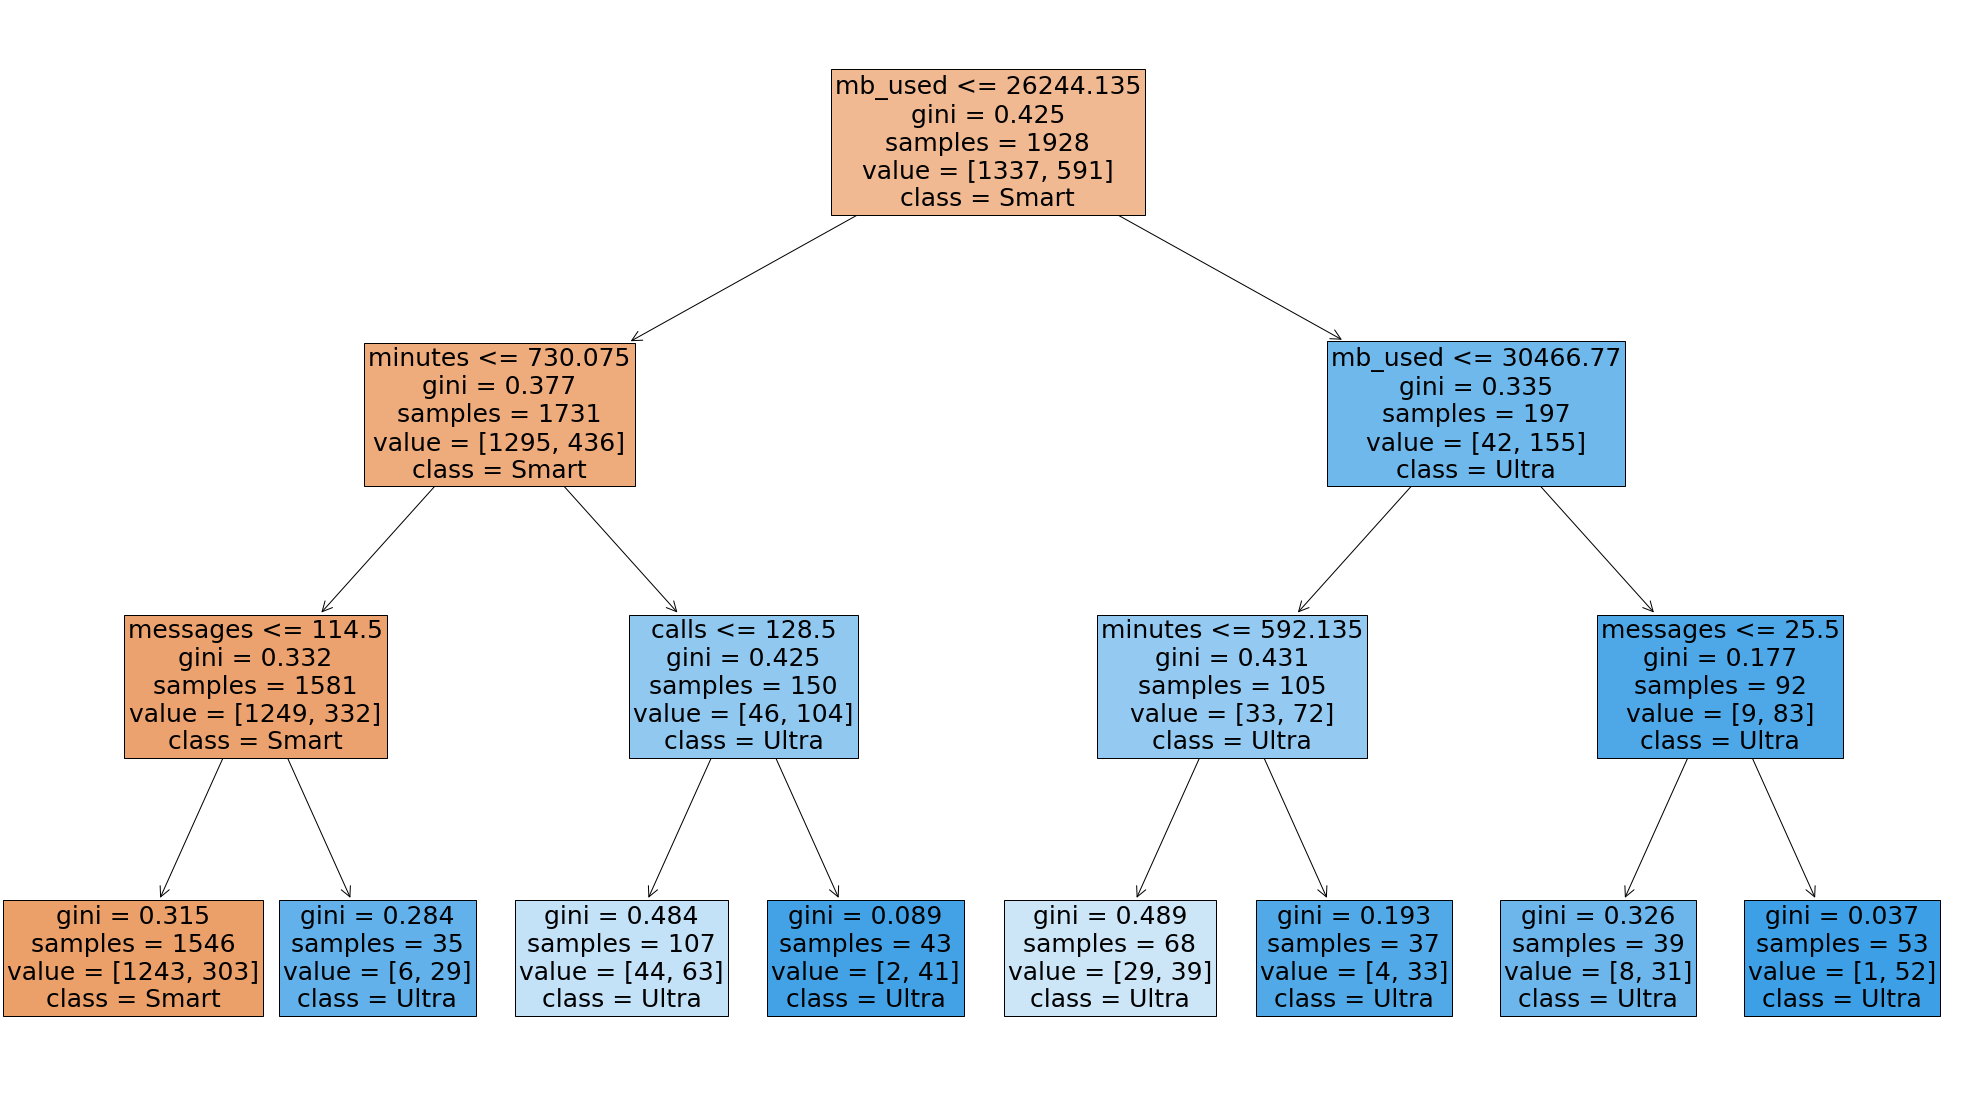

In [20]:
# зададим размер графика

fig = plt.figure(figsize=(35,20))

# построим график дерева решений

_ = plot_tree(best_model_tree, 
               feature_names=features.columns, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize=25)

Мы проверили модели с глубиной дерева от 1 до 10. 
 
**Наилучшей моделью дерева решений по показателю доли правильных ответов оказалась оная с глубиной дерева, равной 3. Результат составляет 80 %**.

Скорее всего, результаты для моделей с глубиной дерева меньшей 3 оказались ниже, т.к. имело место недообучение. В свою очередь более низкие результаты для моделей с глубиной дерева большей 3 связаны с переобучением.

### Случайный лес

Зададим переменные, которым передадим параметры будущей модели.

In [21]:
best_model_forest = None
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0

Напишем циклы, которые выберут лучшую модель (с наибольшей долей правильных ответов) в зависимости от количества деревьев в лесу и их глубины.

In [22]:
%%time

for est in tqdm(range(1, 5)):
    for depth in tqdm(range(1, 11)):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        if result > best_result_forest:
            best_model_forest = model
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth

100%|██████████| 10/10 [00:00<00:00, 152.11it/s]

100%|██████████| 10/10 [00:00<00:00, 68.04it/s][A

100%|██████████| 4/4 [00:00<00:00,  8.34it/s]

CPU times: user 450 ms, sys: 15.9 ms, total: 466 ms
Wall time: 482 ms


In [23]:
%%time

for est in tqdm(range(5, 51, 5)):
    for depth in tqdm(range(1, 11)):
        model = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        if result > best_result_forest:
            best_model_forest = model
            best_result_forest = result
            best_est_forest = est
            best_depth_forest = depth

100%|██████████| 10/10 [00:07<00:00,  1.25it/s]

CPU times: user 7.61 s, sys: 136 ms, total: 7.74 s
Wall time: 8 s


In [24]:
print('Лучший показатель доли правильных ответов:', best_result_forest)
print('Соответствующее ему количество деревьев:', best_est_forest)
print('Соответствующая ему глубина дерева:', best_depth_forest)

Лучший показатель доли правильных ответов: 0.8242612752721618
Соответствующее ему количество деревьев: 25
Соответствующая ему глубина дерева: 10


Мы проверили модели с количеством деревьев от 1 до 5 и от 10 до 50 с шагом 5, а также с глубиной дерева от 1 до 10. 
 
**Наилучшей моделью случайного леса по показателю доли правильных ответов оказалась оная, состоящая из 25 деревьев с глубиной, равной 10. Результат составляет 82 %**.

Такое количество деревьев в моделе с наилучшим показателем может быть связано с переобучением моделей с бОльшим количеством деревьев.

### Логистическая регрессия

Зададим переменные, которым передадим параметры будущей модели.

In [25]:
best_model_regression = None
best_result_regression = 0
best_iter_regression = 0

Напишем циклы, которые выберут лучшую модель (с наибольшей долей правильных ответов) в зависимости от количества итераций обучения.

In [26]:
for iteration in range(100, 1001, 100):
    model = LogisticRegression(solver='lbfgs', max_iter=iteration, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions)
    if result > best_result_regression:
        best_model_regression = model
        best_result_regression = result
        best_iter_regression = iteration

In [27]:
print('Лучший показатель доли правильных ответов:', best_result_regression)
print('Соответствующее ему количество итераций обучения:', best_iter_regression)

Лучший показатель доли правильных ответов: 0.7371695178849145
Соответствующее ему количество итераций обучения: 100


Мы проверили модели с количеством итераций обучения от 100 до 1000 с шагом 100.

Наилучшей моделью логистической регрессии по показателю доли правильных ответов оказалась оная с количеством итераций обучения, равной 100. Результат составляет 73 %.

Небольшое количество итераций обучения наилучшей модели также может быть связано с переобучением моделей с бОльшим количеством итераций.

### Определение лучшей модели

In [28]:
print('Лучший показатель доли правильных ответов для модели дерева решений:', best_result_tree)
print('Лучший показатель доли правильных ответов для модели случайного леса:', best_result_forest)
print('Лучший показатель доли правильных ответов для модели логистической регрессии:', best_result_regression)

Лучший показатель доли правильных ответов для модели дерева решений: 0.7993779160186625
Лучший показатель доли правильных ответов для модели случайного леса: 0.8242612752721618
Лучший показатель доли правильных ответов для модели логистической регрессии: 0.7371695178849145


**Наибольшая доля правильных ответов приходится на модель случайного леса**. Следует отметить, что данная модель также считается наиболее качественной из всех трех. Поэтому **выберем данную модель в качестве основной для проверки на тестовой выборке**.

## Проверьте модель на тестовой выборке

In [29]:
# при помощи лучшей модели случайного леса спрогнозируем тариф на тестовой выборке

predictions_test = best_model_forest.predict(features_test)

In [30]:
# рассчитаем accuracy

result_test = accuracy_score(target_test, predictions_test)

In [31]:
print('Показатель доли правильных ответов для модели случайного леса на тестовой выборке:', result_test)

Показатель доли правильных ответов для модели случайного леса на тестовой выборке: 0.8164852255054432


Показатель доли правильных ответов модели на тестовой выборке оказался немного ниже, чем на валидационной, но выше 75 %.

## Проверьте модели на адекватность

Поскольку в данных (в таргете) налицо дисбаланс классов, для проверки модели на адекватность рассчитаем accuracy для сириэс, состоящего целиком из нулей (т.к. нули встречаются чаще единиц).

In [32]:
# рассчитаем количество 0 и 1 в target_valid

target_valid.value_counts()

0    446
1    197
Name: is_ultra, dtype: int64

In [33]:
# создадим заполненный нулями сириэс с длиной, равной длине сириэс target_valid

predictions_adequacy = target_valid.replace(1, 0)

In [34]:
# рассчитаем accuracy

result_adequacy = accuracy_score(target_valid, predictions_adequacy)

In [35]:
print('Показатель доли правильных ответов для модели случайного леса на сириэс, полностью состоящем из нулей:', result_adequacy)

Показатель доли правильных ответов для модели случайного леса на сириэс, полностью состоящем из нулей: 0.6936236391912908


**Accuracy оказался значительно ниже того, который мы получили на тестовой выборке: 69 против 82. Это говорит о том, что модель случайного леса, проверенная на тестовой выборке, адекватна**.

## Общий вывод

На основе входных данных о поведении клиентов мобильного оператора было проведено машинное обучение. Цель: построение модели для задачи классификации, которая выберет подходящий клиенту тариф. 

В ходе работы был открыт и изучен файл с данными, далее была произведена разбивка данных на три выборки: обучающую, валидационную и тестовую с соотношением 3:1:1. Выборки были изучены и проверены.

Затем были построены три модели: дерева решений, случайного леса и логистической регрессии.

**Дерево решений**.

В цикле перебрали 10 моделей в зависимости от глубины дерева: от 1 до 10.

Лучший показатель доли правильных ответов: 80 %, сответствующая ему глубина дерева: 3.

Также были построены линейный график зависимости правильности предсказаний модели от глубины дерева решений, а также само дерево решений для варианта с наилучшим показателем accuracy.

**Случайный лес**.

Мы проверили модели с количеством деревьев от 1 до 5 и от 10 до 50 с шагом 5, а также с глубиной дерева от 1 до 10.

Наилучшей моделью случайного леса по показателю доли правильных ответов оказалась оная, состоящая из 25 деревьев с глубиной, равной 10. Результат составляет 82 %.

**Логистическая регрессия**.

Мы проверили модели с количеством итераций обучения от 100 до 1000 с шагом 100.

Наилучшей моделью логистической регрессии по показателю доли правильных ответов оказалась оная с количеством итераций обучения, равной 100. Результат составляет 73 %.

**Лучшей моделью** была признана модель случайного леса, т.к. она имеет наибольшую долю правильных ответов. Кроме того, данная модель также считается наиболее качественной из всех трех. 

Данная модель была проверена на **тестовой выборке**. Показатель доли правильных ответов модели (чуть меньше 82 %) оказался немного ниже, чем на валидационной выборке, но выше 75 %.

Также модель была проверена на **адекватность**. В ходе проверки был вычислен accuracy для таргета, целиком состоящего из нулей (т.к. нули в таргете встречаются чаще единиц). Accuracy оказался значительно ниже того, который мы получили на тестовой выборке: 69 против 82. Это говорит о том, что модель случайного леса, проверенная на тестовой выборке, адекватна.